# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [14]:
sp_annuale = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400])
print('Array delle spese annuali:', sp_annuale)

# 1. spesa totale complessiva sostenuta dal gruppo
tot_sp = np.sum(sp_annuale)
print('La spesa totale complessiva del gruppo è: ', tot_sp)

# 2. detrazione fiscale del 15% per spese < 3.000
sp_detr = np.where(sp_annuale<3000, sp_annuale * 0.85, sp_annuale)
print('Spese annuali dopo la detrazione del 15%: ', sp_detr)

# 3. risparmio dopo la detrazione fiscale
tot_post = np.sum(sp_detr)
diff = tot_sp - tot_post
print(f'La spesa totale dopo le detrazioni è di: {tot_post} euro \nIl risparmio è di: {diff} euro')

Array delle spese annuali: [3200 2750 4100 3600 2950 5100 4400]
La spesa totale complessiva del gruppo è:  26100
Spese annuali dopo la detrazione del 15%:  [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
La spesa totale dopo le detrazioni è di: 25245.0 euro 
Il risparmio è di: 855.0 euro


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



dado lanciato 10 volte: [3 1 2 0 1 3]
campione: 10 lanci
frequenze %: [20. 20.  0. 20. 10. 30.]
campione: 60 lanci
frequenze %: [ 5.         15.         21.66666667 16.66666667 18.33333333 23.33333333]
campione: 110 lanci
frequenze %: [25.45454545 11.81818182 14.54545455 21.81818182 11.81818182 14.54545455]
campione: 161 lanci
frequenze %: [13.66459627 20.49689441 14.28571429 15.52795031 20.49689441 15.52795031]
campione: 211 lanci
frequenze %: [16.11374408 21.32701422 10.42654028 18.00947867 17.06161137 17.06161137]


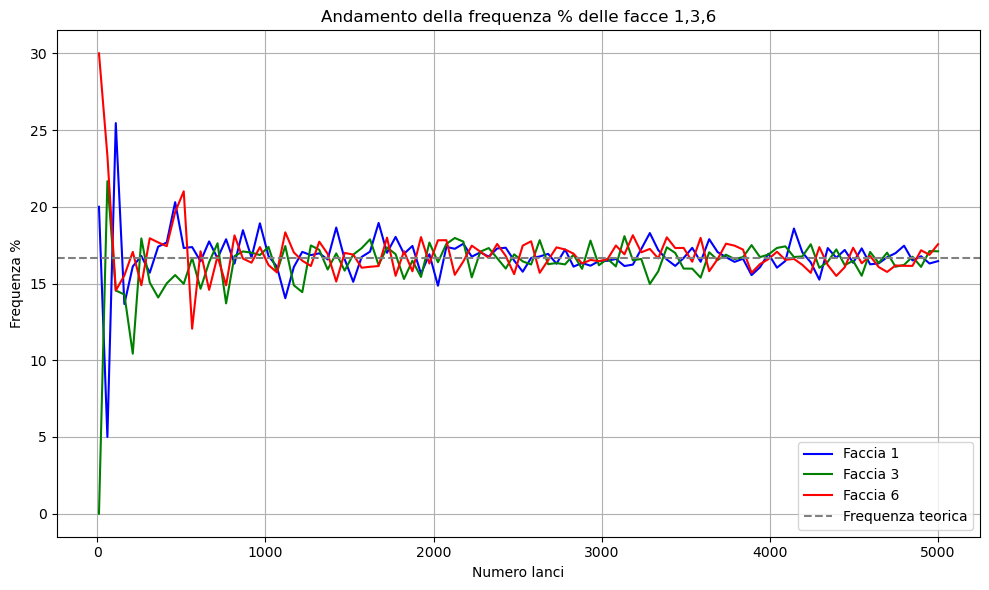

In [26]:
# 1. funzione per il lancio del dado
def lancio_dado(N):

    lanci = np.random.randint(1, 7, size=N)

    conteggio = np.array([(lanci == faccia).sum() for faccia in range(1,7)])

    return conteggio

# prova
print(f'dado lanciato 10 volte: {lancio_dado(10)}')

# 2. frequenze percentuali
def calcolo_freq_perc():
    frequenze = []
    dim_campione = np.linspace(10,5000, 100, dtype=int)

    for N in dim_campione:
        conteggio = lancio_dado(N)
        freq_perc = conteggio / N * 100
        frequenze.append(freq_perc)

    return np.array(frequenze), dim_campione

# prova
frequenze, campioni = calcolo_freq_perc()
for i in range(5):
    print(f'campione: {campioni[i]} lanci')
    print(f'frequenze %: {frequenze[i]}')

# 3. plot delle frequenze
freq_1 = frequenze[:, 0] # faccia 1
freq_3 = frequenze[:, 2] # faccia 3
freq_6 = frequenze[:, 5] # faccia 6

plt.figure(figsize=(10,6))
plt.plot(campioni, freq_1, label='Faccia 1', color='blue')
plt.plot(campioni, freq_3, label='Faccia 3', color='green')
plt.plot(campioni, freq_6, label='Faccia 6', color='red')
plt.axhline(100/6, color='gray', linestyle='--', label='Frequenza teorica')
plt.title('Andamento della frequenza % delle facce 1,3,6')
plt.xlabel('Numero lanci')
plt.ylabel('Frequenza %')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [36]:
np.random.seed(0)
# 1. matrice 7x7 con valori campionati da una distr. normale media=0 std=5
mat = np.random.normal(loc=0, scale=5, size=(7,7))
print('matrice 7x7: \n', mat)

# 2. trovare il valore più lontano da 0
lontano_0 = np.array([row[np.argmax(np.abs(row))] for row in mat])
print(f'\nValori più lontani da zero per ogni riga: \n{lontano_0}')

# 3. righe con valori più lontano da 0 positivo
cont_pos = np.sum(lontano_0 > 0)
print(f'\nCi sono {cont_pos} righe con valori più lontani da 0 positivo')


matrice 7x7: 
 [[  8.82026173   2.00078604   4.89368992  11.204466     9.33778995
   -4.8863894    4.75044209]
 [ -0.75678604  -0.51609426   2.05299251   0.72021786   7.27136753
    3.80518863   0.60837508]
 [  2.21931616   1.66837164   7.47039537  -1.02579132   1.56533851
   -4.2704787  -12.76494908]
 [  3.26809298   4.32218099  -3.7108251   11.34877312  -7.27182837
    0.22879259  -0.93591925]
 [  7.66389607   7.34679385   0.77473713   1.8908126   -4.43892874
   -9.90398234  -1.73956075]
 [  0.78174485   6.1514534    6.01189924  -1.93663409  -1.51151375
   -5.24276483  -7.10008969]
 [ -8.53135095   9.75387698  -2.54826091  -2.19037151  -6.2639768
    3.88745178  -8.06948924]]

Valori più lontani da zero per ogni riga: 
[ 11.204466     7.27136753 -12.76494908  11.34877312  -9.90398234
  -7.10008969   9.75387698]

Ci sono 4 righe con valori più lontani da 0 positivo


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


0     0.200000
1     0.041667
2     0.185714
3     0.360000
4     0.027273
        ...   
72    0.018182
73    0.009091
74    0.060000
75    0.060000
76    0.027273
Name: nutri_score, Length: 77, dtype: float64

5 cereali con nutri score più alto: 
                          name  nutri_score
3   All-Bran with Extra Fiber     0.360000
0                   100% Bran     0.200000
2                    All-Bran     0.185714
9                 Bran Flakes     0.088889
64     Shredded Wheat 'n'Bran     0.077778

Cereali con meno di 120 kal e più di 2g di fibra
                          name  calories  fiber
0                   100% Bran        70   10.0
2                    All-Bran        70    9.0
3   All-Bran with Extra Fiber        50   14.0
8                   Bran Chex        90    4.0
9                 Bran Flakes        90    5.0
19         Cracklin' Oat Bran       110    4.0
26        Frosted Mini-Wheats       100    3.0
32          Grape Nuts Flakes       100    3.0
33                

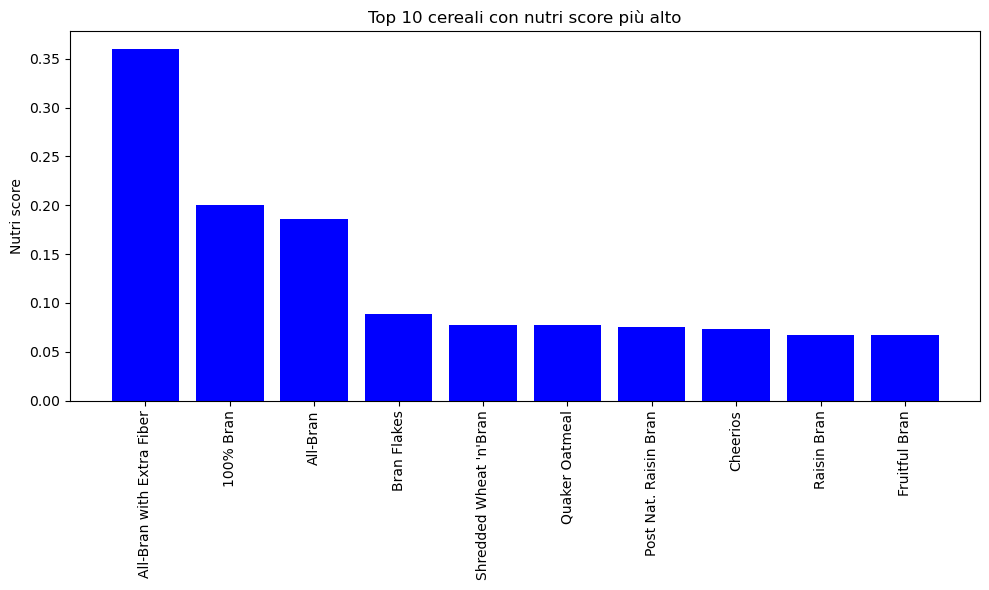

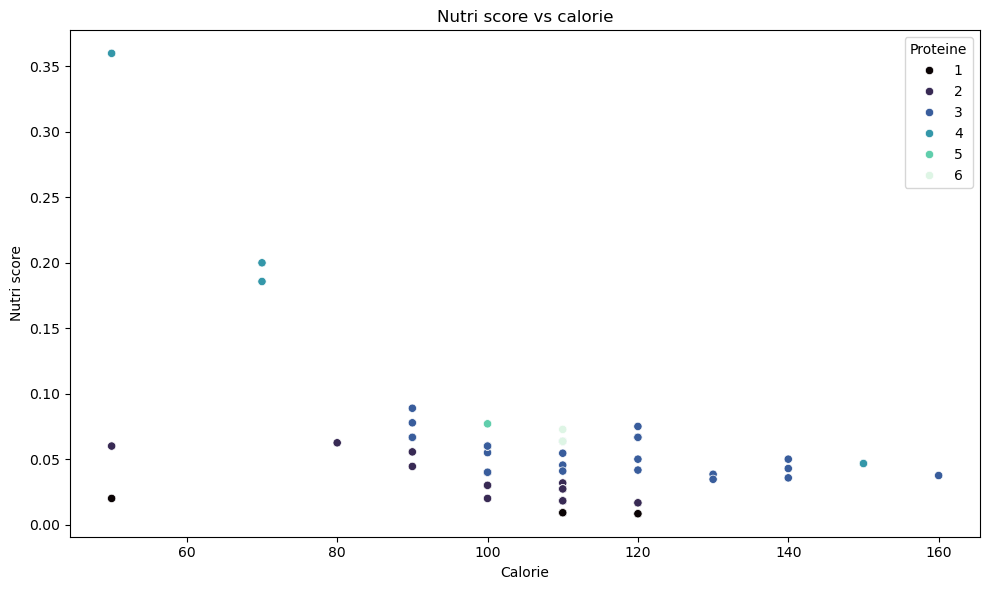

In [69]:
df_cereal = pd.read_csv('cereal.csv', delimiter=';')

# 1. aggiunta della colonna nutri_score
df_cereal['nutri_score'] = (df_cereal['protein'] + df_cereal['fiber']) / df_cereal['calories']
print(df_cereal['nutri_score'])

# 2. trovare i 5 cereali con nutri_score più alto
top_5 = df_cereal.sort_values(by='nutri_score', ascending=False).head(5)
print('\n5 cereali con nutri score più alto: \n',top_5[['name', 'nutri_score']])

# 3. cereali con meno di 120 calorie e più di 2 grammi di fibra
cereal_filtred = df_cereal[(df_cereal['calories'] < 120) & (df_cereal['fiber'] > 2)]
print('\nCereali con meno di 120 kal e più di 2g di fibra\n', cereal_filtred[['name', 'calories', 'fiber']])

# 4. barplot dei top 10 cerali con nutri_score più alto
top_10 = df_cereal.sort_values(by='nutri_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10['name'], top_10['nutri_score'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('Nutri score')
plt.title('Top 10 cereali con nutri score più alto')
plt.tight_layout()
plt.show()

# 5. scatterplot 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cereal, x=df_cereal['calories'], y=df_cereal['nutri_score'], hue=df_cereal['protein'], palette='mako')
plt.title('Nutri score vs calorie')
plt.xlabel('Calorie')
plt.ylabel('Nutri score')
plt.tight_layout()
plt.legend(title='Proteine')
plt.show()

## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




In [92]:
df = pd.read_csv('imdb_top_1000.csv')

# 1. valori mancanti per colonna
print('Valori mancanti per colonna:\n', df.isna().sum())
df = df.dropna()

# 2. eliminare overview e aggiungere main_genre con solo il primo genere di genre
df = df.drop('Overview', axis=1)
df['main_genre'] = df['Genre'].str.split(',').str[0].str.strip()
print('\ncolonna main_genre:\n',df['main_genre'])
top_5 = df['main_genre'].value_counts().head(5)
print(top_5)

Valori mancanti per colonna:
 Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

colonna main_genre:
 0          Drama
1          Crime
2         Action
3          Crime
4          Crime
         ...    
990        Drama
991    Adventure
992    Animation
994       Comedy
997        Drama
Name: main_genre, Length: 714, dtype: object
main_genre
Drama        192
Action       127
Comedy       104
Crime         74
Biography     73
Name: count, dtype: int64


## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

Intervalli di confidenza: 
(np.float64(-4.446317287257158), np.float64(-3.0028344619808793)) 
(np.float64(-0.8782505808432002), np.float64(7.47672017128737))


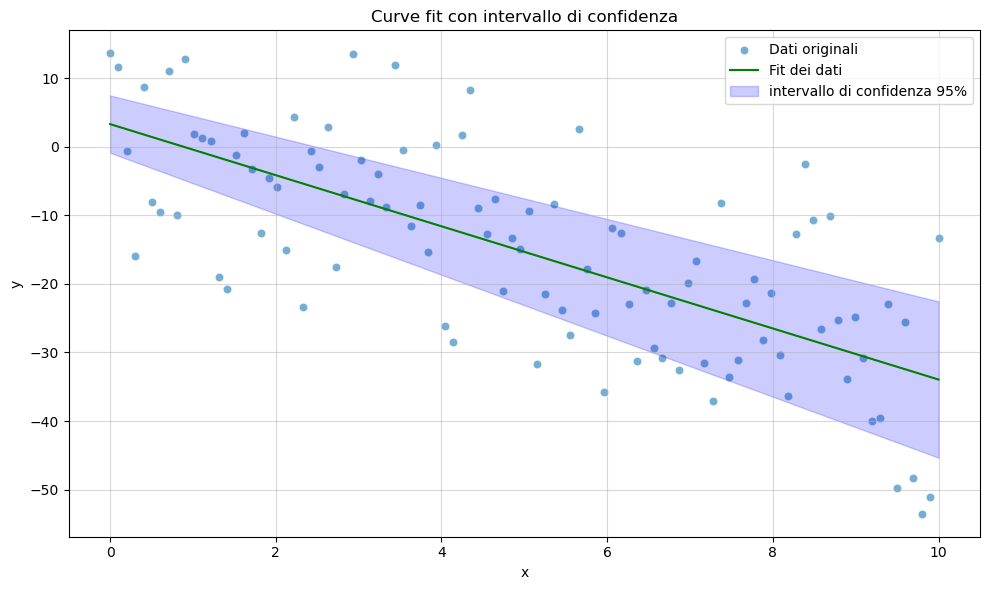

In [110]:
# dati 
x = np.linspace(0, 10, 100)
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

## 1. stimare i parametri della retta

# modello lineare
def linear_model(x, a, b):
    return a * x + b

# stima dei parametri a,b
popt, cov = curve_fit(linear_model, x, y)
a, b = popt
y_pred = linear_model(x, a, b)


## 2. calcolare l'intervallo di confidenza al 95%
err_std = np.sqrt(np.diag(cov))
a_err, b_err = err_std

# intervallo di confidenza
a_conf = (a - 1.96 * a_err, a + 1.96 * a_err)
b_conf = (b - 1.96 * b_err, b + 1.96 * b_err)
print(f'Intervalli di confidenza: \n{a_conf} \n{b_conf}')

# bande di confidenza
y_upper = linear_model(x, a_conf[1], b_conf[1])
y_lower = linear_model(x, a_conf[0], b_conf[0])


## 3. plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Dati originali', alpha=0.6)
sns.lineplot(x=x, y=y_pred, label='Fit dei dati', color='green')
plt.fill_between(x, y_lower, y_upper, color='blue', alpha=0.2, label='intervallo di confidenza 95%')
plt.title('Curve fit con intervallo di confidenza')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()